# <center> Investigate a Dataset | Titanic Data</center>
<hr>

# 1. Introduction to the Project

> RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial  maritime disasters in modern history.

We are given the dataset that contains demographics and passenger information for 891 of the 2224 passengers and crew on board. Our objective is to discover useful information, suggesting conclusions, and supporting decision-making.

***

# 2. Introduction to the Dataset

Let's have a quick look to the Data Dictionary.

|Variable |Definition|	Key                                                     |
|---------|---------------------------------------------------------------------|
|survival |	Survival|	0 = No, 1 = Yes                                         |
|pclass	 |Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
|sex	 |Sex | male, female
|Age	     |Age in years	| numbers
|sibsp	 |# of siblings / spouses| numbers
|parch	 |# of parents / children| numbers
|ticket	 |Ticket number	| character
|fare	 |Passenger fare	| number
|cabin	 |Cabin number	| character
|embarked |	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton

A small note of the variables:


> <b>pclass</b>: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

> <b>age</b>: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

> <b>sibsp</b>: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

> <b>parch</b>: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch = 0 for them.
***

# 3. Data Analysis

So, now I'll analyze the data to find some interesting things. The phases will include:

<ol>
    <li>Questions, I want to answer!</li>
    <li>Data Wrangling</li>
        <ol type="a">
            <li>Data Acquisition</li>
            <li>Data Cleaning</li>
        </ol>
        <br>
    <li>Exploration</li>
    <li>Conclusion</li>
</ol>

## 3.1 Questions, I want to answer!

There's a well know truth that Titanic did not have enough number of lifeboats present. Many people died due to die due to this fact alone. So, there's a kind of <b>preference</b> that must be observed during saving of life in this scenario. Can we find it with the survival stats? Here's a step by step approach I did to find the answer.


>1. How passengers in the dataset are distributed in socio-economic class and fares?
2. Survival rate on the basis of socio-economic class and fare.
3. Survival rate on the basis of embarked ports and how class and fare is distributed for each port?
4. People with family or without family - who have a better survival chance?
5. How survival varied with gender?
6. How survival varied with age?
7. How class is distributed amongst various age groups?

***

## 3.2 Data Wrangling
## 3.2.1 Data Acquisation

In [1]:
# reading the dataset and using basic pandas to see and analyze.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("titanic-data.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Observations

Some basic findings worth noting:

>1. The survival rate of any passenger is 38%.
2. Most people traveled is from the type II (middle) Socio-economic Status.
3. The average age is 29 years.
4. There is about 50% chance of having sibling/spouse/husband relationship.
5. There is about 38% chance of having parent/child relationship.
6. The average fare is 32.

Some <b>errors</b> in the dataset are as follows:
>1. Age has 714 entries. That means there are some empty entries.
2. Minimum Fare is 0. Is that possible in an expensive ship like Titanic?

## 3.2.2 Data Cleaning

Now I am curoious to find which other non-numeric columns have NAN values in them.

In [3]:
# finding NULL content in the non-numeric columns
print titanic_df["Name"][titanic_df["Name"].isnull()].size
print titanic_df["Sex"][titanic_df["Sex"].isnull()].size
print titanic_df["Ticket"][titanic_df["Ticket"].isnull()].size
print titanic_df["Cabin"][titanic_df["Cabin"].isnull()].size
print titanic_df["Embarked"][titanic_df["Embarked"].isnull()].size

0
0
0
687
2


Now since we have found three columns with NAN, we have to decide what we can do with them. We have 2 options - <b>impute</b> them OR <b>delete</b> them. But, <b>deleting</b> will result in a <b>total loss</b> of data, whereas <b>imputing</b> will result in a <b>biasing</b> of data. 

Now we came upon this percentages,
1. Column["Age"] has 177 NAN out of 891 entries = 19.8%
2. Column["Cabin"] has 687 NAN out of 891 entries =  77.1%
3. Column["Embarked"] has 2 NAN out of 891 entries = 0.2%

Now what we can do here in this case is impute the missing values. But we have not yet covered the process of doing so. So, we would rather drop the cabin have no significance.

And I will just try to find the co-relations among the other variables without imputing as pandas simply don't take into account the missing values.

Here are some columns and actions which we think should be applied on them.

>1. <b>PassengerId</b> → seems <b>irrelevant</b>. So we consider <b>dropping</b> it.
2. <b>Name</b> → We would rather try to <b>extract the salutation</b> and find some co-relations of survival with it. Then we can consider <b>dropping</b> it.
1. <b>Age</b> → We keep the NaN values as it is, because the exact process and model for imputation is unknown.
3. <b>SibSp & Parch</b> → We must <b>create a new column "group"</b> which holds how many family members the passenger boarded with.
4. <b>Cabin</b> → We already discussed this column is not much useful with so many <b>missing values</b>. We will <b>drop</b> it. 
1. <b>Embarked</b> → Keep it as it is. 

Creating and filling the columns called "Salutation" and "Groups".

We can observe from the above description that a name like [Braund, Mr. Owen Harris] → [Surname, Salutation, First name, Second Name], which implies the second word is salutation.

In [4]:
# filling the new column named "Salutation" with the second part of the name
titanic_df["Salutation"] = titanic_df["Name"].str.split(" ").str[1]
titanic_df["Group"] = titanic_df["SibSp"] + titanic_df["Parch"]

We can now see, how many "Salutation"s we have.

In [5]:
# printing the "Salutation" column
titanic_df.groupby("Salutation").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group
Salutation,,,,,,,,,,,,,
"Billiard,",1,1,1,1,1,1,1,1,1,1,0,1,1
Capt.,1,1,1,1,1,1,1,1,1,1,1,1,1
"Carlo,",1,1,1,1,1,1,1,1,1,1,0,1,1
Col.,2,2,2,2,2,2,2,2,2,2,1,2,2
"Cruyssen,",1,1,1,1,1,1,1,1,1,1,0,1,1
Don.,1,1,1,1,1,1,1,1,1,1,0,1,1
Dr.,7,7,7,7,7,6,7,7,7,7,3,7,7
"Gordon,",2,2,2,2,2,2,2,2,2,2,2,2,2
"Impe,",3,3,3,3,3,3,3,3,3,3,0,3,3


We have some Salutations like "y", "the", "der" etc which we have never heard of and they also makes no sense.

>So, we may conclude to <b>delete</b> "Salutation" also.

In [6]:
# Dropping PassengerId, Name, Salutation, Cabin
titanic_df = titanic_df.drop("PassengerId", 1)
titanic_df = titanic_df.drop("Name", 1)
titanic_df = titanic_df.drop("Salutation", 1)
titanic_df = titanic_df.drop("Cabin", 1)

In [7]:
# seeing the new modified DataFrame
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Group
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,1,1,female,35.0,1,0,113803,53.1000,S,1
4,0,3,male,35.0,0,0,373450,8.0500,S,0


Now, we have fixed all the NAN-filled columns. Our next thing to check is if all the cells have a clear meaning of minimum values. (Ex: Age = 0, Fare = 0 will have no meaning). We have already found FARE to be one of them. So, just checking them before moving to the next analysis.

In [8]:
# checking how many values in Fare is equal to 0
titanic_df["Fare"][titanic_df["Fare"] == 0].size

15

So, we have 15 fares with 0\$, which seems quite impossible in a costly ship like Titanic. But the models of imputing with either mean-median-mode does not seem promising. We also know that pandas, when generating statistics from variables that have missing data, will omit the rows with missing data. So, skipping it.

***

## 3.3 Data Exploration

### 3.3.1 How socio-economic class is distributed in the total dataset.

The main idea is to find how many people belonged to which class in the RMS Titanic.

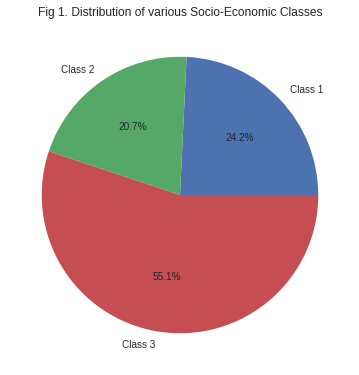

In [9]:
# getting total number of records with class as 1, 2 and 3
class1 = titanic_df["Pclass"][titanic_df["Pclass"]==1].size
class2 = titanic_df["Pclass"][titanic_df["Pclass"]==2].size
class3 = titanic_df["Pclass"][titanic_df["Pclass"]==3].size

# plotting the distribution of three classes 1, 2 and 3
plt.figure(1, figsize=(6,6))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
plt.pie([class1, class2, class3], labels=["Class 1", "Class 2", "Class 3"], autopct='%1.1f%%')
plt.title("Fig 1. Distribution of various Socio-Economic Classes")

### Observation

>The RMS Titanic had maximum passengers from the socio-economic class 3, followed by socio-economic class 2 and class 1.

***

### 3.3.2 How is Fare related to various Socio-economic Class?

We try to explore the <b>notion</b> - "People from higher socio-economic class will buy tickets of higher price".

In [10]:
# trying to find if there's a margin of ticket fare of the 3 classes 
print titanic_df[titanic_df["Fare"] != 0].groupby("Pclass")["Fare"].min()
print titanic_df[titanic_df["Fare"] != 0].groupby("Pclass")["Fare"].max()
print titanic_df[titanic_df["Fare"] != 0].groupby("Pclass")["Fare"].mean()

Pclass
1     5.0000
2    10.5000
3     4.0125
Name: Fare, dtype: float64
Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64
Pclass
1    86.148874
2    21.358661
3    13.787875
Name: Fare, dtype: float64


So, we can see that "Passenger Class" is <b>not dependent</b> on the "Fare" of the ticket he has bought. 1st class passenger is buying a ticket of 5\$ which is way less than the mean fare (86\$) of 1st class. Also such intermixing can be seen from the above statistics. We may <b>plot</b> a graph to see the intermixing.

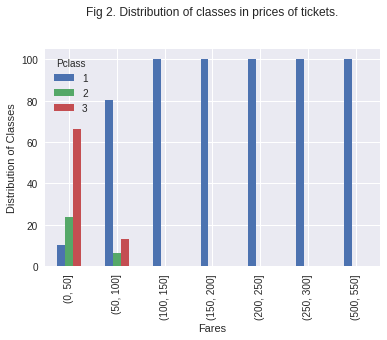

In [11]:
# plotting the distribution of classes in various ticket fare ranges
ax = titanic_df.groupby([pd.cut(titanic_df["Fare"], np.arange(0, 551, 50)), "Pclass"])["Survived"].count().groupby(level = 0).transform(lambda x: 100*x/sum(x)).unstack().plot(kind = 'bar')
ax.set_xlabel("Fares")
ax.set_ylabel("Distribution of Classes")
ax.set_title("Fig 2. Distribution of classes in prices of tickets.\n\n");

### Observation

>1. Tickets within range 0\$-50\$ is bought mainly by Class 3 people. However Class 2 and Class 1 people also bought ticket within that range.
2. Tickets within range 50\$-100\$ is bought at max by Class 1 people. However Class 3 and Class 2 people also bought ticket within that range.
3. All other tickets from 100\$-512\$ is bought by the Class 1 people only.

***

### 3.3.3 Survival Rate of Various Socio-economic Class

We may now try to observe how survival rate varied as per socio-economic class. This may give us an insight if there were any <b>preferences</b> of class during evacuation.

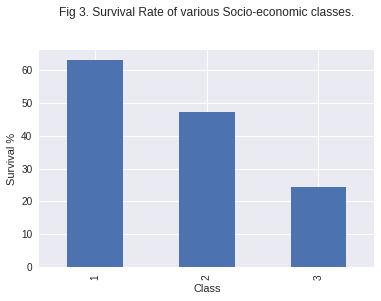

In [12]:
# plotting the survival rate of various socio-economic classes
ax = titanic_df.groupby("Pclass")["Survived"].mean().transform(lambda x: x*100).plot(kind = 'bar')
ax.set_xlabel("Class")
ax.set_ylabel("Survival %")
ax.set_title("Fig 3. Survival Rate of various Socio-economic classes.\n\n");

### Observation

We can see survival rate of Class 1 is highest, followed by Class 2 and then Class 3.

>So, we may conclude there was <b>some preference</b> given to people from higher socio-economic class. 

***

### 3.3.4 Survival Rate on basis of Fare

Now we are again interested to find the same notion - if higher ticket price played any role in survival rate. Let's find out.

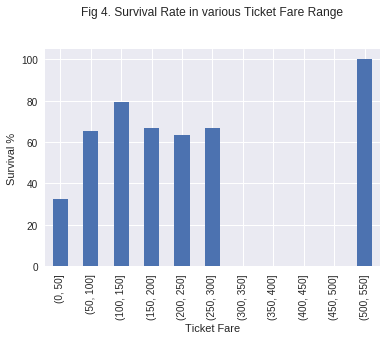

In [13]:
# plotting the survival rate based on various price ranges
ax = titanic_df.groupby([pd.cut(titanic_df["Fare"], np.arange(0, 551, 50))])["Survived"].mean().transform(lambda x: x*100).plot(kind = 'bar')
ax.set_xlabel("Ticket Fare")
ax.set_ylabel("Survival %")
ax.set_title("Fig 4. Survival Rate in various Ticket Fare Range\n\n");

### Observation

We can see that the least fare range (mainly bought by class 3 people) has the least survival rate. And the last ticket range (mainly bought by class 1 people) has the best survival rate.

>We may conclude that there was a <b>preference</b> for class 1 people and people with higher ticket price.

***

### 3.3.5 Survival rate on the basis of Embarked Port

We may be interested on finding if people from a particular port has a higher survival rate.

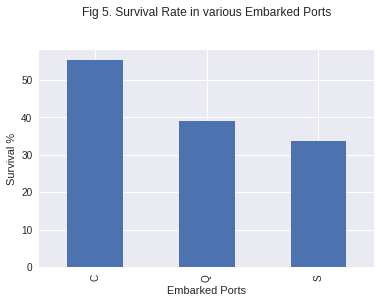

In [14]:
# trying to find survival rate on each of the three ports
ax = titanic_df.groupby(["Embarked"])["Survived"].mean().transform(lambda x: x*100).plot(kind = 'bar')
ax.set_xlabel("Embarked Ports")
ax.set_ylabel("Survival %")
ax.set_title("Fig 5. Survival Rate in various Embarked Ports\n\n");

### Observation

>Quite a success! We have people from Cherbourg with the highest survival rate. This makes us curious to find how <b>embarked port</b> is associated with <b>class</b> and <b>ticket fare</b>.

***

### 3.3.6 How Embarked Port is related to Class and Ticket Fare?

Like we have just discussed, we got a high survival rate for Class 1 people as well as for people with high priced tickets. Again as our analysis says, there's a particular port on which survival rate is high. So, is there's a co-relation? Let's find it out.

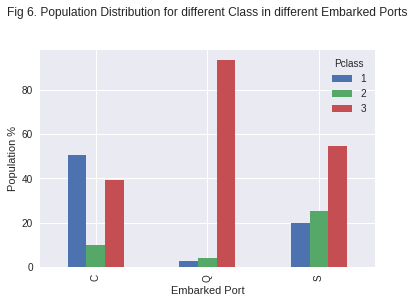

In [15]:
# finding how people from various classes embarked the ship on the 3 ports
ax = titanic_df.groupby(["Embarked","Pclass"])["Survived"].count().groupby(level = 0).transform(lambda x: 100*x/x.sum()).unstack().plot(kind = 'bar')
ax.set_xlabel("Embarked Port")
ax.set_ylabel("Population %")
ax.set_title("Fig 6. Population Distribution for different Class in different Embarked Ports\n\n");

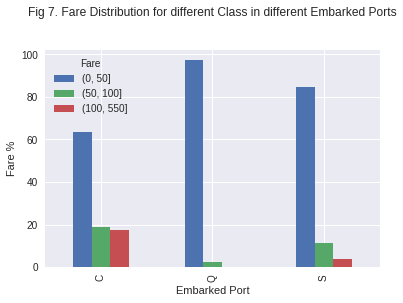

In [16]:
# finding the percentage of low, mid and high priced tickets in the embarked ports
ax = titanic_df.groupby(["Embarked", pd.cut(titanic_df["Fare"], [0, 50, 100, 550])])["Survived"].count().groupby(level = 0).transform(lambda x: 100*x/x.sum()).unstack().plot(kind = 'bar')
ax.set_xlabel("Embarked Port")
ax.set_ylabel("Fare %")
ax.set_title("Fig 7. Fare Distribution for different Class in different Embarked Ports\n\n");

### Observation

So, we are correct! 

>The distribution of Class in Cherbourg had maximum of class 1 people and also had the highest survival rate.


>The Fare Distribution also shows that people from Cherbourg did buy most costly tickets which can also be the cause of the high survival rate.

***

### 3.3.7 How survival rate of people varied with family?

We are now interested to find how the survival rate of people varied with those who have either of sibling, spouse, parent or child and those who have not. One thing to remember, we already have a column group that takes into account the size of the family of a particular passenger. 

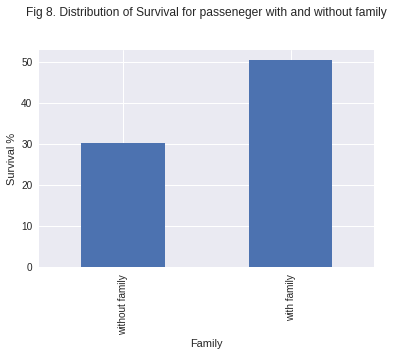

In [17]:
# plotting the distribution of passengers against family and without family
ax = titanic_df.groupby(pd.cut(titanic_df["Group"], [-1,0,11]))["Survived"].mean()*100
ax.index = ["without family", "with family"]
ax = ax.plot(kind = 'bar')
ax.set_xlabel("Family")
ax.set_ylabel("Survival %")
ax.set_title("Fig 8. Distribution of Survival for passeneger with and without family\n\n");

### Observation

>Strange! We expected people without family to be evacuated easily without hassles of finding other lost family members. But things seems different. Most probably people without family gave way to those with a family.

***

### 3.3.8 How men and women were distributed in the population?

A long waited analysis - what were the number of men and women?

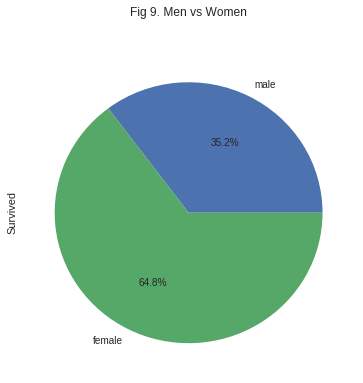

In [18]:
# plotting the distribution of sex amongst the passengers
div_sex = titanic_df.groupby('Sex')["Survived"].count().plot.pie(title='Fig 9. Men vs Women\n\n', labels=["male", "female"], autopct='%1.1f%%', figsize=(6,6))

### Observation

>We can see that we have more male passengers on board than females (almost double).

***
<br>
### 3.3.9 Survival Rate of Male and Female

Once we have seen the distribution of male and female, we may also want to see the survival distribution of male and female.

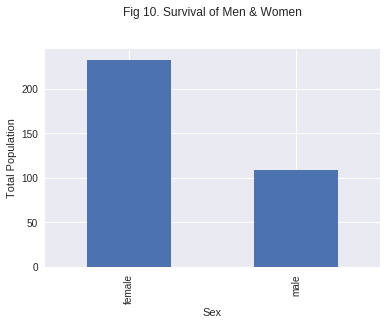

In [19]:
# plotting the survival of the sexes
div_sex = titanic_df[titanic_df["Survived"] == 1].groupby("Sex")["Survived"].count()
ax = div_sex.plot.bar(title='Fig 10. Survival of Men & Women\n\n')
ax.set_ylabel("Total Population")

### Observation

>We can see a clear trend! We can make a mere conclusion that women were rescued first.

Taking this conclusion, let us investigate more to see other factors such as age in survival rate of the females.

***

### 3.3.10  How age played a role in survival ?

We all know that the rescue protocol is - "Save women and children first". We already a trend showing women were rescued first given their high survival rate. Let's see how age played a role in male, female and as a whole.

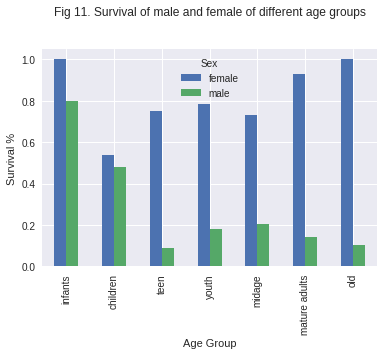

In [20]:
# let us assume the age groups as:
# the groups based on age
# infants (0-1)
# children (2-12)
# teen (13-18)
# youth (19-35)
# midage (36-50)
# mature adults (51-60)
# old (60+)
# now finding survival rate of male and female in the given age groups
ax = titanic_df.groupby([pd.cut(titanic_df["Age"], [0, 1, 12, 18, 35, 50, 60, 100]), "Sex"])["Survived"].mean().unstack()
ax.index=["infants", "children", "teen", "youth", "midage", "mature adults", "old"]
ax = ax.plot(kind='bar')
ax.set_xlabel("Age Group")
ax.set_ylabel("Survival %")
ax.set_title("Fig 11. Survival of male and female of different age groups\n\n");

### Observation

So, we can conclude the following points as from this.

>1. Infant females have a survival rate of 100% as well as male infants have 80%. ("Babies First" was followed well).
2. Survival rate of female children is very less compared to other female age groups. (possibly they were unable to adapt to the extreme conditions). However male children have a very high survival rate. So, we can again conclude - <b>"children of both sex were given preference"</b>.
3. Survival of teenagers, youths and mid-aged people are more or less same for both sexes.
4. Finally mature adults and old aged people shows an impressive survival rate in females. So, these age grouped people also are given preference in females. However old males died highly due to the extreme weather.
5. In all age groups, <b>male</b> survival rate is low. This shows a high possibility of the preference of women in all scenarios.

***

### 3.3.11 We may want to see what is the distribution of class, survival and survival rate of various classes in different  age groups.

Now as we have seen the survival rate of various age groups, we may try to extend our previous conclusions by seeing more closely how the classes are spread in various age groups.

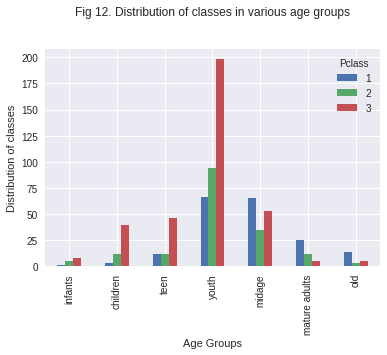

In [21]:
# plotting how class varied in different age groups
x = titanic_df.groupby([pd.cut(titanic_df["Age"], [0, 1, 12, 18, 35, 50, 60, 100]), "Pclass"])["Survived"].count().unstack()
x.index=["infants", "children", "teen", "youth", "midage", "mature adults", "old"]
ax = x.plot(kind='bar')
ax.set_ylabel("Distribution of classes")
ax.set_xlabel("Age Groups")
ax.set_title("Fig 12. Distribution of classes in various age groups\n\n");

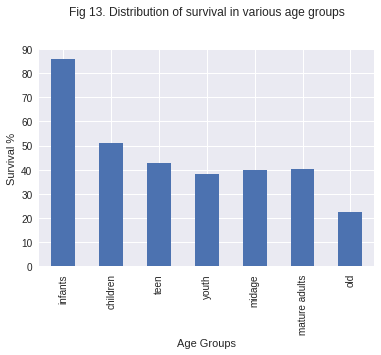

In [22]:
# plotting how survival varied in different age groups
x = titanic_df.groupby([pd.cut(titanic_df["Age"], [0, 1, 12, 18, 35, 50, 60, 100])])["Survived"].mean().transform(lambda x: x*100)
x.index=["infants", "children", "teen", "youth", "midage", "mature adults", "old"]
ax = x.plot(kind='bar')
ax.set_ylabel("Survival %")
ax.set_xlabel("Age Groups")
ax.set_title("Fig 13. Distribution of survival in various age groups\n\n");

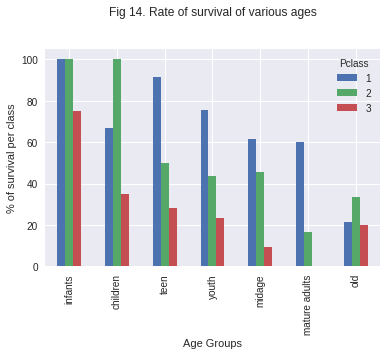

In [23]:
# plotting the survival stats of each class in different age groups
x = titanic_df.groupby([pd.cut(titanic_df["Age"], [0, 1, 12, 18, 35, 50, 60, 100]), "Pclass"])["Survived"].mean().unstack().transform(lambda x: x*100)
x.index=["infants", "children", "teen", "youth", "midage", "mature adults", "old"]
ax = x.plot(kind='bar')
ax.set_ylabel("% of survival per class")
ax.set_xlabel("Age Groups")
ax.set_title("Fig 14. Rate of survival of various ages\n\n");

### Observation

We can say that mostly mature adults and old people are from higher socio-economic status following the first graph.

>And again based on various age groups we can clearly see the class 3 people least survived (even this is true for infants - sadly)
***

## 4. Conclusion

However we can surely make some co-relations and they are finally summarized below:

>1. Class 3 people were mostly affected through out (fig 3).
2. Passengers with lowest priced ticket survived least while those with highest priced tickets survived like anything else (fig 4).
3. People from Cherbourg did buy most costly tickets, mostly had people from class 1 and thus had the most survival rate (fig 5, 6, 7).
4. Men has a lower survival in all age groups (fig 10, 11).
3. Women and infants were saved first (fig 10, 11).
4. Old aged female were also given preference (fig 10, 11).
6. We can also see that survival rate of class 3 people were least in all age groups except infants and old (fig 13).

We can use the Pearson's r to see how accurate are these co-relations.

In [24]:
# copying to perform the Pearson's R in a seperate Dataframe
titanic_df_corr = titanic_df.copy()
# adding numeric columns for sex and infant and old_age
titanic_df_corr['Sex_num'] = np.where(titanic_df_corr['Sex'] == 'female', 1, 0)
titanic_df_corr['infant'] = np.where(titanic_df_corr['Age'] < 2, 1, 0)
titanic_df_corr['old_age'] = np.where(titanic_df_corr['Age'] >= 60, 1, 0)
# finding the R
titanic_df_corr.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Group,Sex_num,infant,old_age
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,0.543351,0.122966,-0.040857
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,-0.131900,0.028934,-0.159798
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,-0.093254,-0.280867,0.474027
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,0.114631,0.103813,-0.045971
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,0.245489,0.164202,-0.015904
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,0.182333,0.003637,0.039319
Group,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,0.200988,0.152986,-0.039365
Sex_num,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.200988,1.000000,-0.017640,-0.072063
infant,0.122966,0.028934,-0.280867,0.103813,0.164202,0.003637,0.152986,-0.017640,1.000000,-0.021905
old_age,-0.040857,-0.159798,0.474027,-0.045971,-0.015904,0.039319,-0.039365,-0.072063,-0.021905,1.000000


There are some shortcomings in this analysis. Some are 
* <b>Missing data</b> present here is a serious issue. Although <b>Pandas automatically eliminate</b> cases with missing data, in the end, we may <b>not have enough data</b> to perform the analysis (ex: "cabin"). If we run a  factor analysis on just a few cases, the analysis might run but the results <b>may not be statistically significant</b> because of the small amount of input data (the sample being so small).
* I <b>did not impute age</b>. As a result, the precision of confidence intervals maybe harmed, statistical power maybe weakened and the parameter estimates maybe biased.So, there might be some improvement of the results. One way we could have used to impute other than mode-median-mean is we can find the median of age of people of a particular class and gender.

In [25]:
# copying to perform the imputation in a seperate Dataframe
titanic_im1 = titanic_df.copy()
# creating the class-sex-age master imputation table
base = titanic_df.groupby(["Pclass", "Sex"])["Age"].median().unstack()
# function to replace NAN ages with suitable values from class-sex-age master imputation table
def impute_age(x):
    if np.isnan(x["Age"]):
        if (x["Sex"] == "female") & (x["Pclass"] == 1):
            x["Age"] = base.iloc[:1, :1].values[0][0]
        if (x["Sex"] == "female") & (x["Pclass"] == 2):
            x["Age"] = base.iloc[1:2, :1].values[0][0]
        if (x["Sex"] == "female") & (x["Pclass"] == 3):
            x["Age"] = base.iloc[2:3, :1].values[0][0]
        if (x["Sex"] == "male") & (x["Pclass"] == 1):
            x["Age"] = base.iloc[:1, 1:2].values[0][0]
        if (x["Sex"] == "male") & (x["Pclass"] == 2):
            x["Age"] = base.iloc[1:2, 1:2].values[0][0]
        if (x["Sex"] == "male") & (x["Pclass"] == 3):
            x["Age"] = base.iloc[2:3, 1:2].values[0][0]
    return x
# operating each row of the faulty dataset for imptuing age
titanic_im1 = titanic_im1.apply(impute_age, axis=1)
# displaying the outcome
print "Number of NULL entries in age is : " + str(titanic_im1["Age"][titanic_im1["Age"].isnull()].size)
titanic_im1["Age"].describe()

Number of NULL entries in age is : 0


count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

As we can see from the output, age is successfully imputed.
However we have not done the analysis using this imputation. The reason is, we yet do not know the metric to calculate how accurate and robust this model will be. 

* Apart from the case of imputation, we have not explored some other areas like "building family" using people who share same tickets, their surnames and SibSp and Parch relations.
* Also we have not used any statistical tests except Pearson's R to support our co-relations.
* Some statistical tests can be carried out in future like Chi-Square Test for Independence, Spearman, Kendall etc. But we keep them as future scope.

Thank you for reading!

## 5. References

1. www.stackoverflow.com
2. www.datacamp.com
3. www.kaggle.com/c/titanic